In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [2]:
def funcy(x, y, z):
    return np.array([x*np.sqrt(y), z])
def funcu(x, u, z, y):
    if(y == 0):
        y=0.0000001
    return np.array([0.5 * x * u / np.sqrt(y), z])

In [3]:
def runge_kutta_4(x_0, y_0, z_0, h, a, b):
    steps = int((b-a)/h)
    yks = np.array([], dtype = float)
    zks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, y_0)
    zks = np.append(yks, z_0)
    xks = np.append(xks, x_0)

    for n in range(steps):
        k_1 = h*funcy(xks[n], yks[n], zks[n])
        k_2 = h*funcy(xks[n]  + 0.5 * h, yks[n] + 0.5*k_1[1], zks[n] + 0.5*k_1[0])
        k_3 = h * funcy(xks[n] + 0.5 * h, yks[n] + 0.5 * k_2[1], zks[n] + 0.5 * k_2[0])
        k_4 = h * funcy(xks[n] + h, yks[n] + k_3[1], zks[n] + k_3[0])
        x_n = xks[n] + h
        y_n = yks[n] + (k_1[1] + 2*k_2[1] + 2*k_3[1] + k_4[1]) / 6
        z_n = zks[n] + (k_1[0] + 2*k_2[0] + 2*k_3[0] + k_4[0]) / 6

        zks = np.append(zks, z_n)
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return (xks, yks)

def runge_kutta_4_u(x_0, u_0, z_0, y, h, a, b):
    steps = int((b-a)/h)
    yks = np.array([], dtype = float)
    zks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, u_0)
    zks = np.append(yks, z_0)
    xks = np.append(xks, x_0)

    for n in range(steps):
        k_1 = h*funcu(xks[n], yks[n], zks[n], y[n])
        k_2 = h*funcu(xks[n]  + 0.5 * h, yks[n] + 0.5*k_1[1], zks[n] + 0.5*k_1[0], y[n])
        k_3 = h * funcu(xks[n] + 0.5 * h, yks[n] + 0.5 * k_2[1], zks[n] + 0.5 * k_2[0], y[n])
        k_4 = h * funcu(xks[n] + h, yks[n] + k_3[1], zks[n] + k_3[0], y[n])
        x_n = xks[n] + h
        y_n = yks[n] + (k_1[1] + 2*k_2[1] + 2*k_3[1] + k_4[1]) / 6
        z_n = zks[n] + (k_1[0] + 2*k_2[0] + 2*k_3[0] + k_4[0]) / 6
        zks = np.append(zks, z_n)
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return (xks, yks)

def shooting_method(a0, x0, y0, u0, a, b, h, yl):
    diff = 0
    y_total = np.array([], dtype = float)
    for i in range(6):
        y_sol = runge_kutta_4(x0, y0, a0, h, a, b)

        u_sol = runge_kutta_4_u(x0, u0, 1, y_sol[1], h, a, b)

        diff = y_sol[1][-1] - yl
        a0 = a0 - (diff)/u_sol[1][-1]
        y_total = y_sol[1]

    return a0, diff, y_total


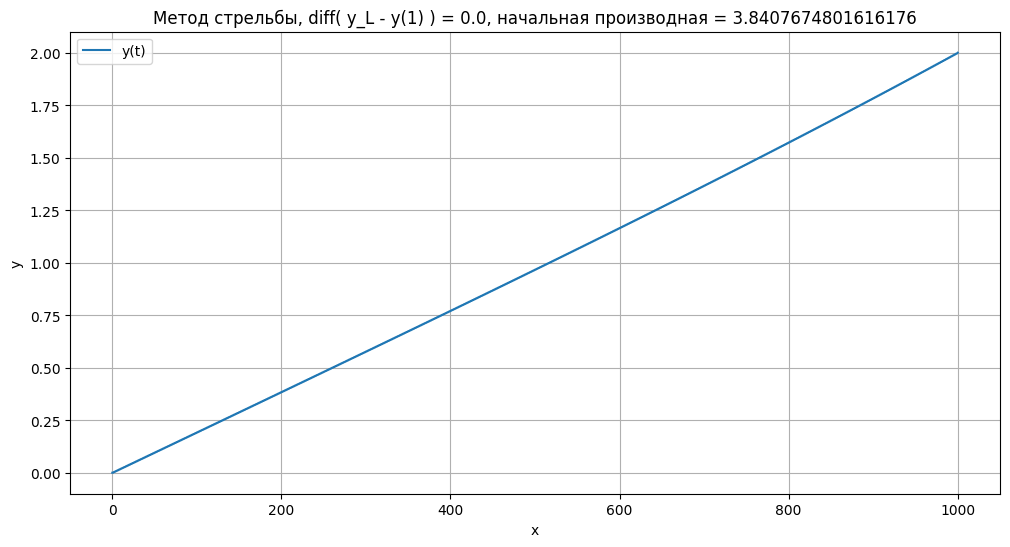

In [4]:

a0, diff, y_total = shooting_method(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.001, 2)

plt.figure(figsize=(12, 6))
plt.plot(y_total, label='y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод стрельбы, diff( y_L - y(1) ) = ' + str(diff) + ', начальная производная = ' + str(a0))
plt.legend()
plt.grid(True)
plt.show()


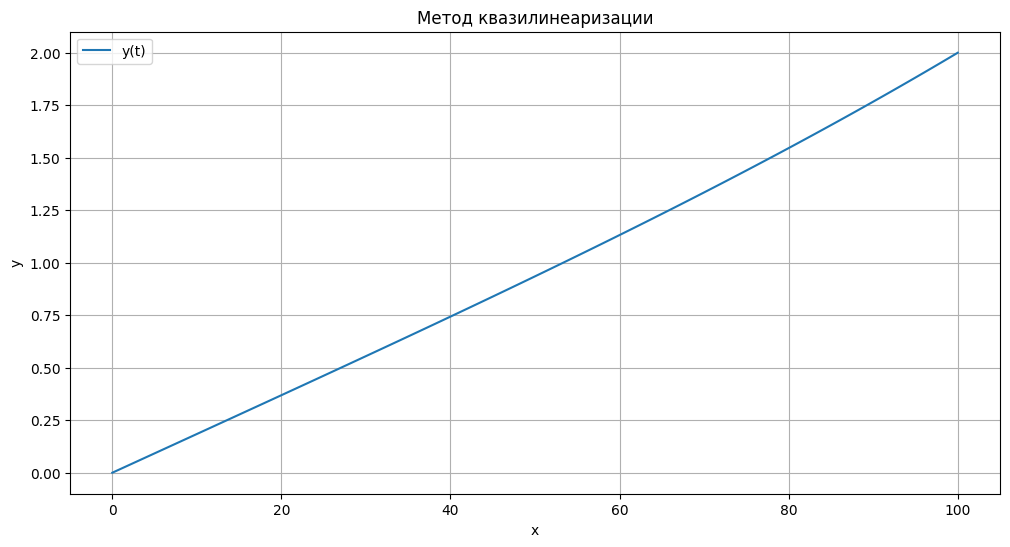

In [10]:

def diag_algorithm(a, b, c, d):

    n = len(d)
    c_ = [0] * n
    d_ = [0] * n
    x = [0] * n


    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i-1] * c_[i-1]
        if i < n-1:
            c_[i] = c[i] / denom
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / denom


    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

def newton_quasilinearization(max_iter=100, tol=1e-6, h=0.01):

    n = int(1/h) + 1
    x = np.linspace(0, 1, n)

    y = 2 * x

    for iteration in range(max_iter):

        a = np.array([], dtype = float)
        b = np.array([], dtype = float)
        c = np.array([], dtype = float)
        d = np.array([], dtype = float)


        b = np.append(b,1)
        c = np.append(c,0)
        d = np.append(d,0)
        a = np.append(a,0)


        for i in range(1, n-1):
            xi = x[i]
            yi = y[i]

            if yi <= 0:

                coeff = 0
                rhs = 0
            else:
                coeff = xi / (2 * np.sqrt(yi))
                rhs = xi * np.sqrt(yi) - coeff * yi

            a_i = 1/h**2
            b_i = -2/h**2 - coeff
            c_i = 1/h**2
            d_i = rhs

            a = np.append(a, a_i)
            b = np.append(b, b_i)
            c = np.append(c, c_i)
            d = np.append(d, d_i)


        a = np.append(a, 0)
        b = np.append(b, 1)
        c = np.append(c, 0)
        d = np.append(d, 2)


        y_new = diag_algorithm(a[1:], b, c[:-1], d)


        max_diff = max(abs(y_new[i] - y[i]) for i in range(n))
        if max_diff < tol:

            break

        y = y_new
    else:
        print("OVERLOAD")

    return x, y


x, y = newton_quasilinearization()

plt.figure(figsize=(12, 6))
plt.plot(y, label='y(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод квазилинеаризации')
plt.legend()
plt.grid(True)
plt.show()




Найденные собственные значения:
1: λ = 0.114453
2: λ = 0.117389
3: λ = 0.440617
4: λ = 0.457952
5: λ = 0.937629
6: λ = 1.001027
7: λ = 1.561022
8: λ = 1.732700
9: λ = 2.313303
10: λ = 2.648184
11: λ = 3.251876
12: λ = 3.748974
13: λ = 4.405923


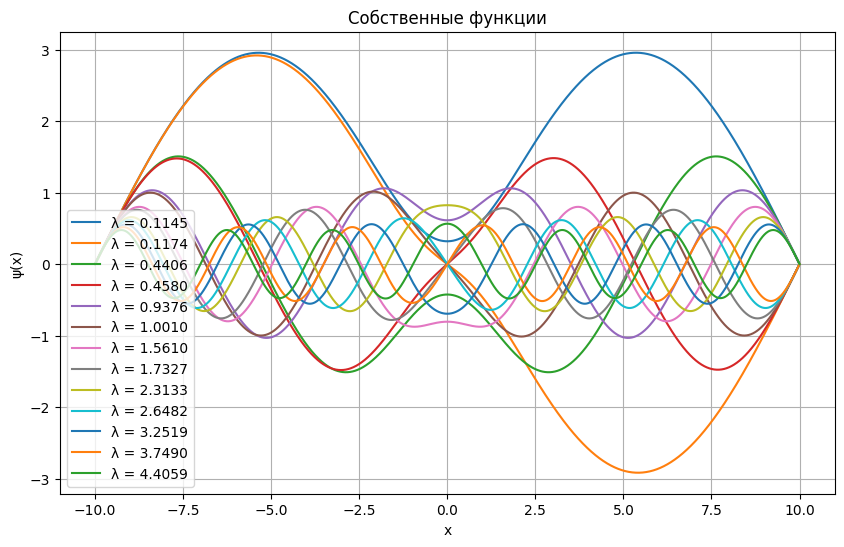

In [39]:
import numpy as np
import matplotlib.pyplot as plt


L = 10.0
N = 2000
h = 2 * L / (N - 1)
x = np.linspace(-L, L, N)


def V(x):
    return -2 / np.cosh(x)**2


def runge_kutta_4(lmbd):
    psi = np.zeros(N)
    phi = np.zeros(N)


    psi[0] = 0.0
    phi[0] = 1.0

    for i in range(N-1):
        k1_psi = h * phi[i]
        k1_phi = h * (-(lmbd + V(x[i])) * psi[i])

        k2_psi = h * (phi[i] + 0.5 * k1_phi)
        k2_phi = h * (-(lmbd + V(x[i] + 0.5*h)) * (psi[i] + 0.5 * k1_psi))

        k3_psi = h * (phi[i] + 0.5 * k2_phi)
        k3_phi = h * (-(lmbd + V(x[i] + 0.5*h)) * (psi[i] + 0.5 * k2_psi))

        k4_psi = h * (phi[i] + k3_phi)
        k4_phi = h * (-(lmbd + V(x[i] + h)) * (psi[i] + k3_psi))

        psi[i+1] = psi[i] + (k1_psi + 2*k2_psi + 2*k3_psi + k4_psi)/6
        phi[i+1] = phi[i] + (k1_phi + 2*k2_phi + 2*k3_phi + k4_phi)/6

    return psi


def boundary_mismatch(lmbd):
    psi = runge_kutta_4(lmbd)
    return psi[-1]


def find_eigenvalue(lmbd_min, lmbd_max, tol=1e-6):
    f_min = boundary_mismatch(lmbd_min)
    f_max = boundary_mismatch(lmbd_max)



    while abs(lmbd_max - lmbd_min) > tol:
        lmbd_mid = (lmbd_min + lmbd_max) / 2
        f_mid = boundary_mismatch(lmbd_mid)

        if f_min * f_mid < 0:
            lmbd_max = lmbd_mid
            f_max = f_mid
        else:
            lmbd_min = lmbd_mid
            f_min = f_mid

    return (lmbd_min + lmbd_max) / 2


def find_all_eigenvalues(lmbd_start, lmbd_end, num_search_points=1000):
    lambdas = np.linspace(lmbd_start, lmbd_end, num_search_points)
    mismatches = [boundary_mismatch(lmbd) for lmbd in lambdas]

    eigenvalues = []
    for i in range(len(mismatches)-1):
        if mismatches[i] * mismatches[i+1] < 0:
            lmbd_left = lambdas[i]
            lmbd_right = lambdas[i+1]
            eig = find_eigenvalue(lmbd_left, lmbd_right)
            eigenvalues.append(eig)
    return eigenvalues


lmbd_min = 0.0
lmbd_max = 5

eigenvalues = find_all_eigenvalues(lmbd_min, lmbd_max)

print("\nНайденные собственные значения:")
for i, eig in enumerate(eigenvalues):
    print(f"{i+1}: λ = {eig:.6f}")


plt.figure(figsize=(10, 6))
for lmbd in eigenvalues:
    psi = runge_kutta_4(lmbd)
    plt.plot(x, psi, label=f'λ = {lmbd:.4f}')

plt.title('Собственные функции')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.legend()
plt.grid(True)
plt.show()


Найденное собственное значение лямбда: -1.000389
Найденное собственное значение лямбда: -1.000389
Найденное собственное значение лямбда: -1.000389
Найденное собственное значение лямбда: -1.000389
Найденное собственное значение лямбда: -1.000389
Найденное собственное значение лямбда: 0.474055
Найденное собственное значение лямбда: 1.043444
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.473854
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.473854
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.473854
Найденное собственное значение лямбда: 0.473854
Найденное собственное значение лямбда: 1.043444
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямбда: 0.120783
Найденное собственное значение лямб

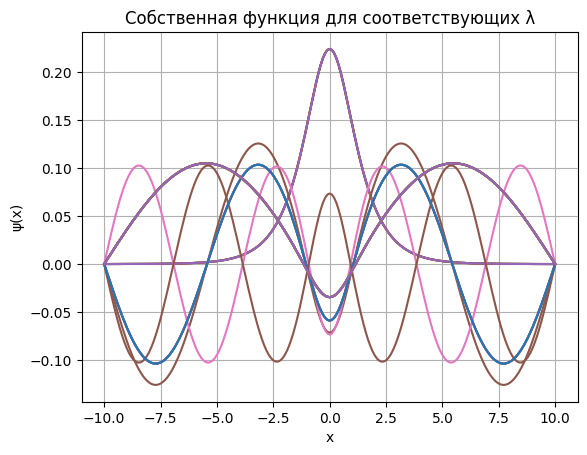

In [69]:
import numpy as np
import matplotlib.pyplot as plt

L = 10
N = 200
h = 2 * L / N

x = np.linspace(-L, L, N+1)



def F(Y):
    y = Y[:-1]
    lam = Y[-1]
    F_val = np.zeros(N+2)

    for k in range(1, N):
        F_val[k] = (y[k-1] - 2*y[k] + y[k+1]) / h**2 + (lam + 2/np.cosh(x[k])**2) * y[k]

    F_val[0] = y[0]
    F_val[N] = y[N]
    F_val[N+1] = np.sum(y**2) - 1

    return F_val


def Jacobian(Y):
    y = Y[:-1]
    lam = Y[-1]
    J = np.zeros((N+2, N+2))

    for k in range(1, N):
        J[k, k-1] = 1/h**2
        J[k, k] = -2/h**2 + (lam + 2/np.cosh(x[k])**2)
        J[k, k+1] = 1/h**2
        J[k, N+1] = y[k]

    J[0,0] = 1.0
    J[N,N] = 1.0
    J[N+1, :-1] = 2*y
    J[N+1, -1] = 0.0

    return J


arr_lambda = np.array([], dtype=float)

for k in range(100):
    y = np.sin(np.pi * (x + L) / (2*L))
    y[0] = 0
    y[-1] = 0
    lambda_guess = -1.0 + k * 0.01
    Y = np.concatenate([y, [lambda_guess]])
    max_iter = 20
    tol = 1e-8

    for it in range(max_iter):
        F_val = F(Y)
        J = Jacobian(Y)
        try:
            delta_Y = np.linalg.solve(J, -F_val)
        except np.linalg.LinAlgError:
            print("Матрица Якоби вырождена!")
            break
        Y = Y + delta_Y

    if(np.size(np.where(arr_lambda==Y[-1])[0]) == 0):
        arr_lambda = np.append(arr_lambda, Y[-1])
        y = Y[:-1]
        lam = Y[-1]

        print(f"Найденное собственное значение лямбда: {lam:.6f}")


        plt.plot(x, y)

plt.title(f'Собственная функция для соответствующих λ')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.grid(True)
plt.show()
